In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

plt.style.use('netflix.mplstyle')

palette = {'primary': '#221f1f', 'secondary': '#b20710', 'accent': '#e50914', 'tertiary': '#f5f5f1'}

In [3]:
reviews = pd.read_csv('data/reviews_clean.csv', index_col='review_id')
reviews

,reviewer,movie,rating,review_summary,review_date,spoiler_tag,review_detail,helpful
review_id,,,,,,,,
5704482,raeldor-96879,After Life,9.0,Very Strong Season 2,3 May 2020,0,"I enjoyed the first season, but I must say I t...","['1', '1']"
5704483,dosleeb,The Valhalla Murders,6.0,Icelandic detectives?,3 May 2020,0,I know Iceland is a small country and police d...,"['2', '2']"
5704493,UniqueParticle,Unstoppable,8.0,Excellent last film of legendary Director Tony...,3 May 2020,0,A suspenseful thrilling adventure about a loos...,"['3', '4']"
5704496,Hellooo1234321,Dangerous Lies,NaN,Not bad,3 May 2020,0,Highlight was Camila Mendes exceptional acting...,"['2', '3']"
5704507,indieevan,The Master,8.0,"Great Potential, Less Great Execution",3 May 2020,0,"The premise was a 10, but the execution left a...","['1', '1']"
...,...,...,...,...,...,...,...,...
98919,compsecure,Point Blank,NaN,role made for the original 60s action man,23 April 2004,0,This was a movie made for Marvin. Whether by d...,"['33', '44']"
98920,kyle-garabadian,Point Blank,9.0,Point Blank is one of the most influential fil...,12 June 2004,0,Point Blank is one of those lost gems from the...,"['97', '119']"
98921,sol-kay,Point Blank,8.0,John Boorman's hypnotic & stylish 1967 crime t...,14 July 2004,0,"****SPOILERS***** Mal Reese, John Vernon, took...","['2', '4']"


In [4]:
movie_mean_scores = reviews.groupby(['movie'])['rating'].mean()
movie_total_reviews = reviews.groupby(['movie'])['rating'].count()

movie_scores = pd.concat({'mean': movie_mean_scores, 'n_reviews': movie_total_reviews}, axis=1)

movie_scores.loc[['Bee Movie', 'Person of Interest']]

,mean,n_reviews
movie,,
Bee Movie,6.064189,296
Person of Interest,8.743590,351


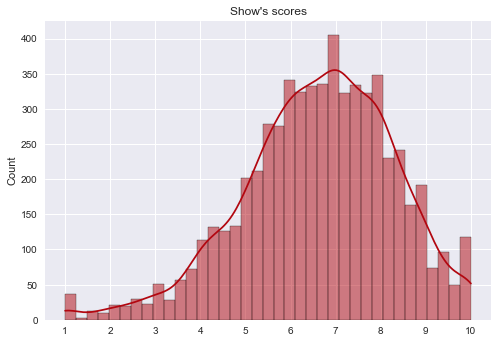

In [29]:
# movie_scores.plot(kind='hist', y='mean', bins=10)
fig, ax = plt.subplots()
sns.histplot(movie_scores['mean'], kde=True, color=palette['secondary'], ax=ax)

ax.set_title('Show\'s scores')
ax.set_xlabel('')
ax.set_xticks(range(1, 11));

Text(0.5, 1.0, 'Ratings by users')

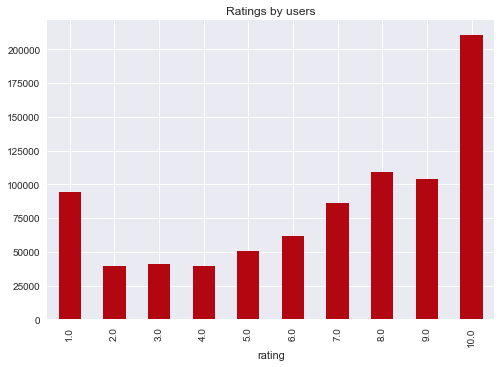

In [27]:
# reviews['rating'].plot(kind='bar', color=palette['secondary'])
fig, ax = plt.subplots()
reviews.groupby('rating')['movie'].count().plot(kind='bar', color=palette['secondary'], ax=ax)

ax.set_title('Ratings by users')